In [1]:
# import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load the data
data=pd.read_csv('/content/Leads.csv')

In [3]:
#Top rows of the data
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of the data
data.shape

(9240, 37)

In [5]:
# info related to the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# description of the data(stats)
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#check missing values in the dataset
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# drop unnecessary columns
data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
#Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [10]:
# again checking missing values
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#dropping cols with more than 45% missing values
cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [12]:
# again checking missing values
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

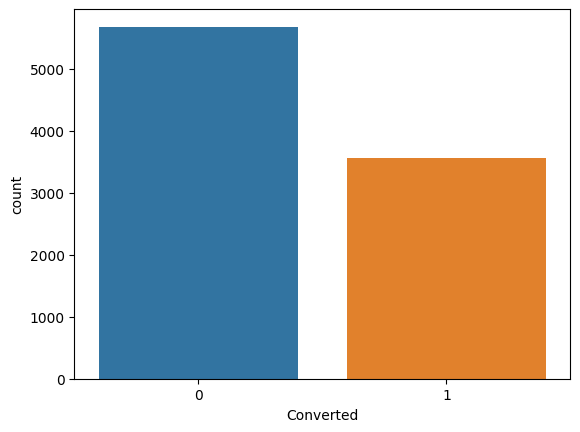

In [13]:
# plot countplot to visulaize the total conversions
sns.countplot(data=data,x='Converted')
plt.show()

In [14]:
# inspecting country column
data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [15]:
#dropping country column as most values are either india or null
data = data.drop(['Country'], axis=1)

In [16]:
# inspecting city column
data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
# replacing missing values with mode in the city column
data['City'] = data['City'].replace(np.nan,'Mumbai')

In [18]:
#inspecting specialization column
data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

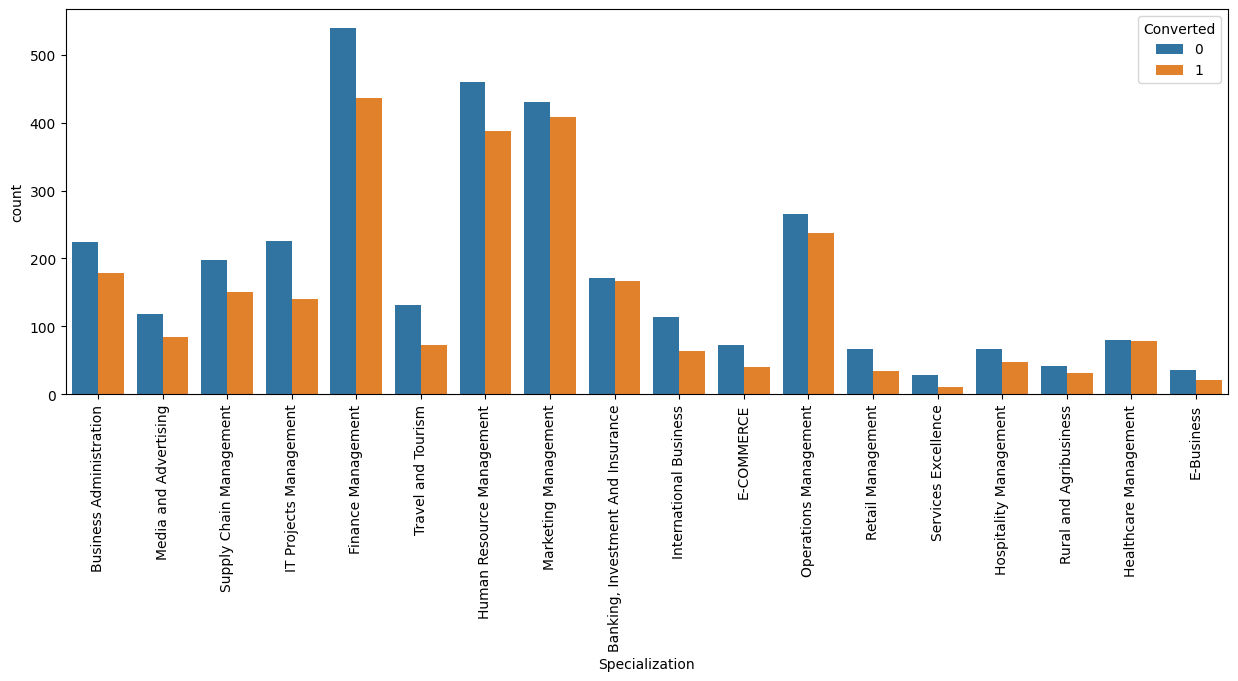

In [19]:
# plotting countplot to visualize the specialization column
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='Specialization',hue='Converted')
plt.xlabel("Specialization")
plt.xticks(rotation=90)
plt.show()

In [20]:
# replacing the low frequencies vaues to all manangement specializations in specialization column
data['Specialization'] = data['Specialization'].replace(['Finance Management',
                                                         'Human Resource Management',
                                                         'Marketing Management',
                                                         'Operations Management',
                                                         'IT Projects Management',
                                                         'Supply Chain Management',
                                                         'Healthcare Management',
                                                         'Hospitality Management',
                                                         'Retail Management'],

                                                        'All_Management_Specializations')

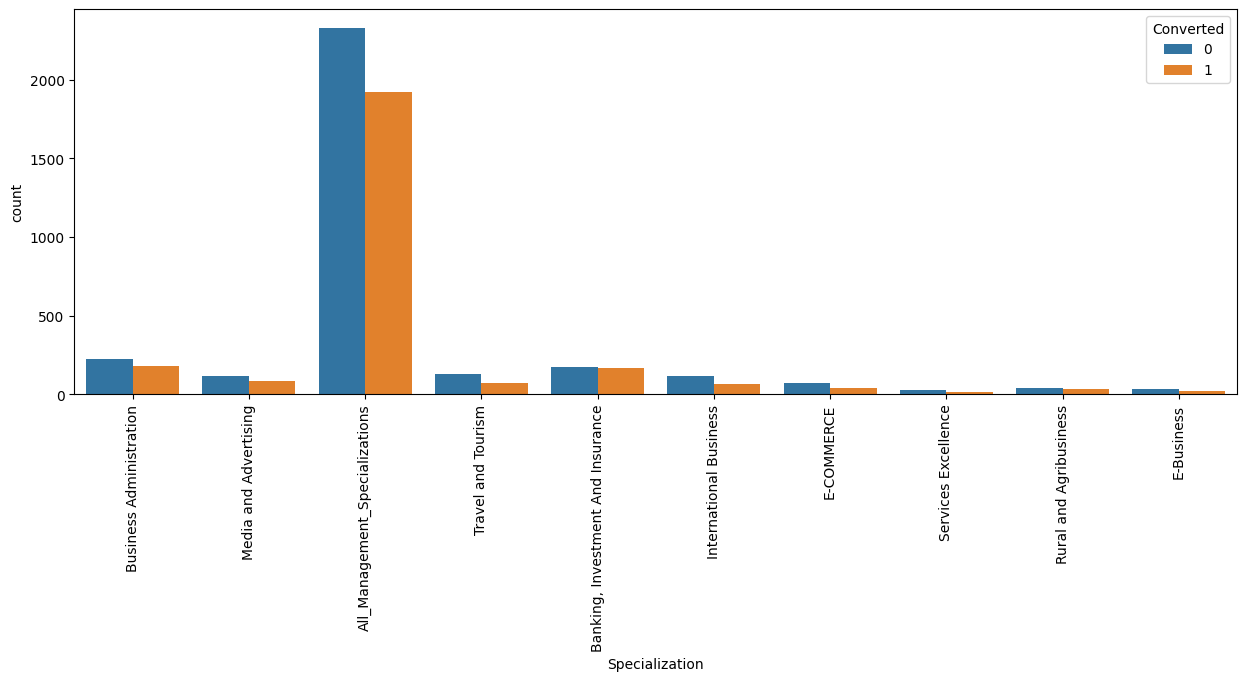

In [21]:
#again plotting countplot to visualize the specialization column
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='Specialization',hue='Converted')
plt.xlabel("Specialization")
plt.xticks(rotation=90)
plt.show()

In [22]:
# inpsecting what is your current occupation column
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#imputing Nan values with mode "Unemployed"
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

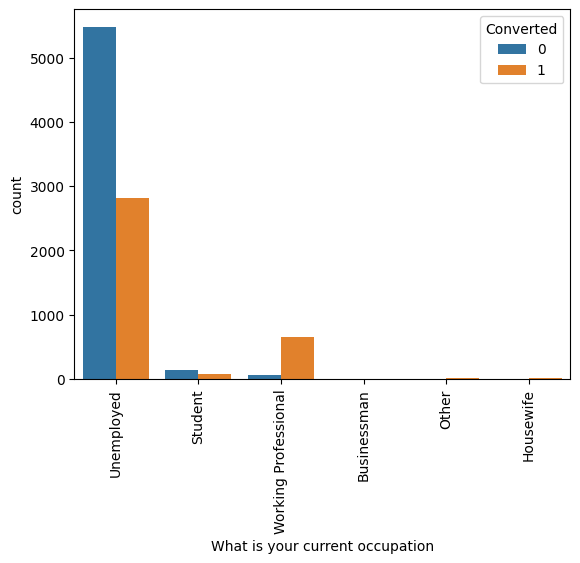

In [24]:
# plotting the countplot
sns.countplot(data=data,x='What is your current occupation',hue='Converted')
plt.xlabel("What is your current occupation")
plt.xticks(rotation=90)
plt.show()

In [25]:
# insecting the What matters most to you in choosing a course column
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
#dropping the What matters most to you in choosing a course column
data = data.drop(['What matters most to you in choosing a course'], axis=1)

In [27]:
#inspecting the tags column
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                    'wrong number given','Interested  in full time MBA'], 'Other')



In [29]:
#againg checking the value counts
data['Tags'].value_counts(dropna=False)

NaN                                    3353
Will revert after reading the email    2072
Other                                  1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [30]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

In [31]:
# replacing the nan values with not specified
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

In [32]:
#Checking the missing values
data.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [33]:
# inspecting the lead source column
data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [34]:
#replacing Nan Values and combining low frequency values
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [35]:
# again checking the lead source column
data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

In [36]:
# inpecting column Last Activity
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
#replacing Nan Values and combining low frequency values
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [38]:
#again checking missing values
data.isnull().sum()

Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                                 0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [39]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
data = data.dropna()

In [40]:
# again checking missing values
data.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

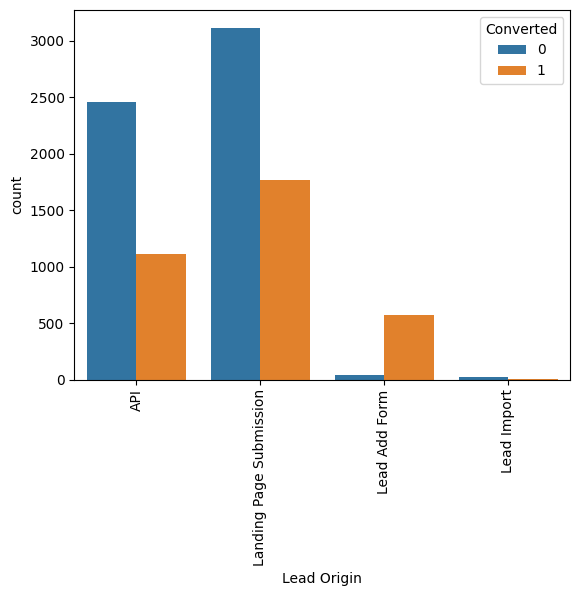

In [41]:
# plotting countplot of lead orign conversions
sns.countplot(data=data,x='Lead Origin',hue='Converted')
plt.xlabel("Lead Origin")
plt.xticks(rotation=90)
plt.show()

API and Landing Page Submission bring higher number of leads as well as conversion.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [42]:
# checking the shape of the data
data.shape

(9103, 26)

In [43]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [44]:
# dropping the do not call column as it is highly imbalanced
data = data.drop(['Do Not Call'], axis=1)

In [45]:
#inspecting the search column
data.Search.value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [46]:
# Inspecting the magazine column
data['Magazine'].value_counts()

No    9103
Name: Magazine, dtype: int64

In [47]:
# inspecting the newspaper article
data['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [48]:
# inspecting xeducation formn column
data['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [49]:
#inspecting the newspaper column
data['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [50]:
# Inspecting the digital advertisement colum
data['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [51]:
# inspecting the through recomndation column
data['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [52]:
# inspecting the Receive More Updates About Our Courses column
data['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [53]:
# inspecting the Update me on Supply Chain Content column
data['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [54]:
# inspecting the Get updates on DM Content column
data['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [55]:
# inspecting the I agree to pay the amount through cheque column
data['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [56]:
# inspecting the A free copy of Mastering The Interview column
data['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [57]:
# dropping the above variables that are highly imbalanced
data = data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [58]:
# checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [59]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [60]:
#clubbing lower frequency values
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked','Approached upfront',
                                                                       'Form Submitted on Website', 'Email Received'],
                                                                      'Other_Notable_activity')

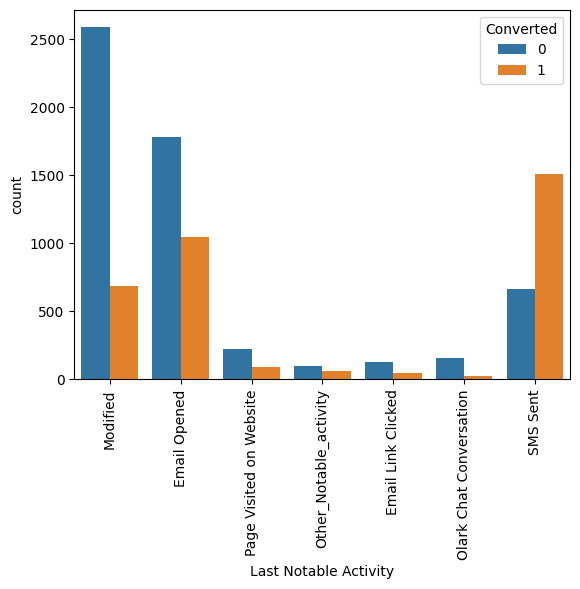

In [61]:
# plotting countplot of Last Notable Activity and their conersion
sns.countplot(data=data,x='Last Notable Activity',hue='Converted')
plt.xlabel("Last Notable Activity")
plt.xticks(rotation=90)
plt.show()

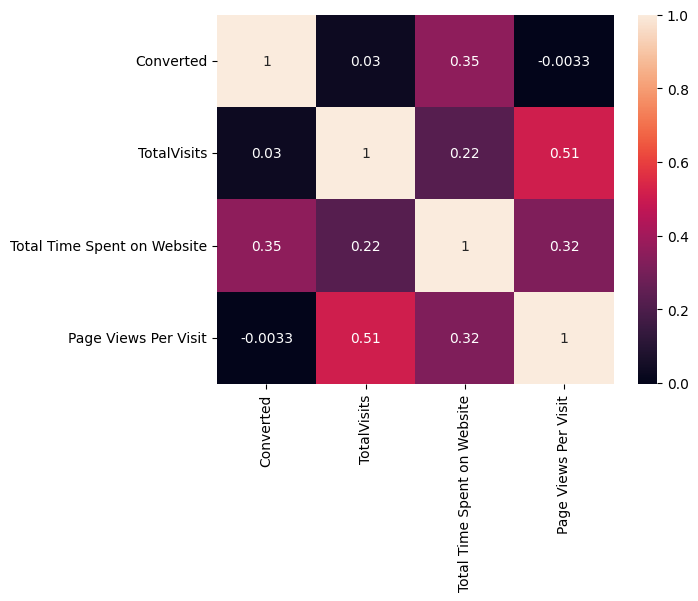

In [62]:
# plotting heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

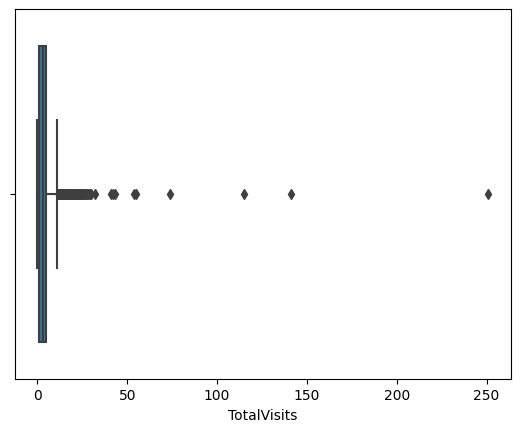

In [63]:
# plotting boxplot to visualize outlier
sns.boxplot(x=data['TotalVisits'])
plt.show()

In [64]:
#checking stats description go the total visits column
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

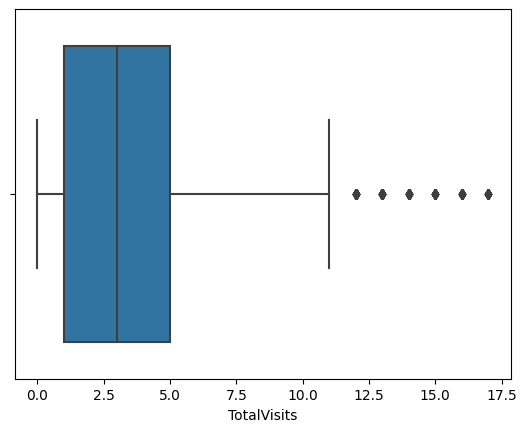

In [65]:
# plotting boxplot to visualize outlier
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = data.TotalVisits.quantile(0.99)
data = data[(data.TotalVisits <= Q3)]
Q1 = data.TotalVisits.quantile(0.01)
data = data[(data.TotalVisits >= Q1)]

sns.boxplot(x=data['TotalVisits'])
plt.show()

In [66]:
#checking the shape
data.shape

(9020, 14)

In [67]:
#checking the Total Time Spent on Website column
data['Total Time Spent on Website'].describe()

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
25%         7.000000
50%       243.000000
75%       915.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

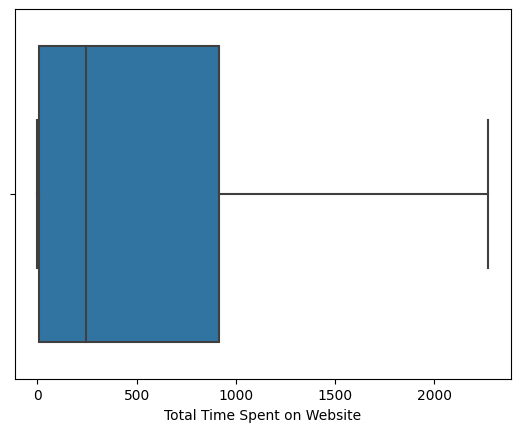

In [68]:
# plotting boxplot to visualize outlier
sns.boxplot(x=data['Total Time Spent on Website'])
plt.show()

In [69]:
#checking stats description
data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

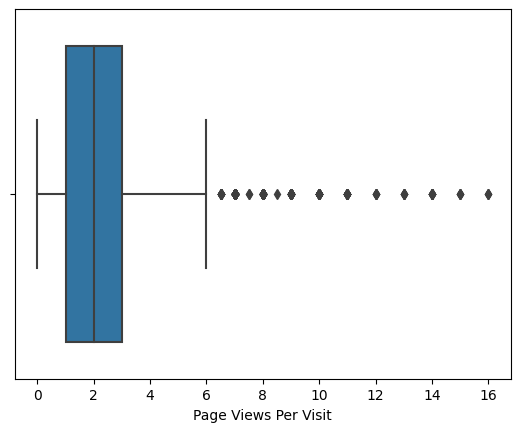

In [70]:
# plotting boxplot to visualize outlier
sns.boxplot(x=data['Page Views Per Visit'])
plt.show()

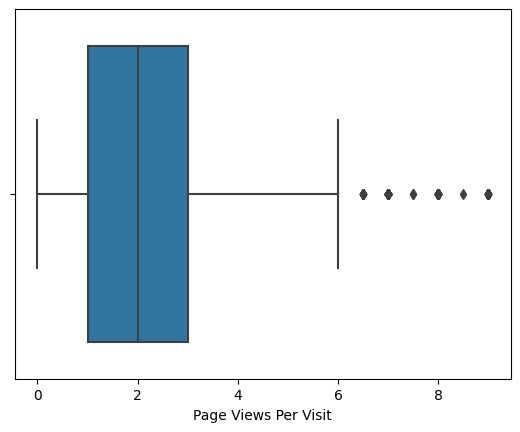

In [71]:
#Outlier Treatment: Remove top & bottom 1%
# plotting boxplot to visualize outlier
Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]

sns.boxplot(x=data['Page Views Per Visit'])
plt.show()

In [72]:
# checking shape
data.shape

(8953, 14)

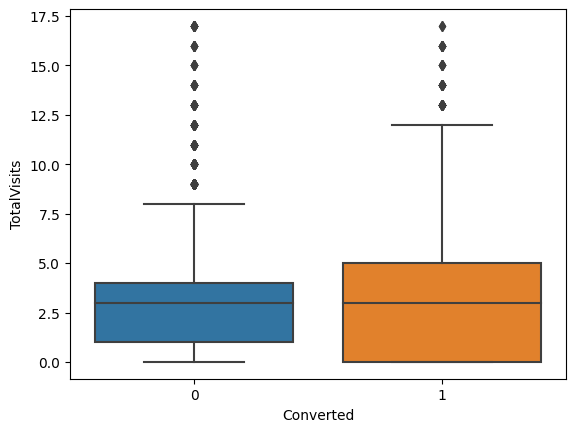

In [73]:
# plotting boxplot to visualize outlier
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

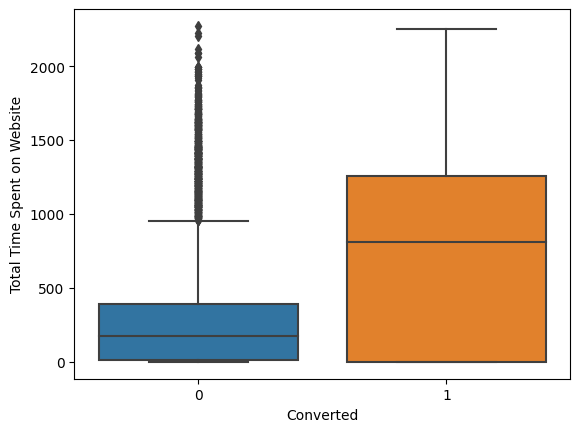

In [74]:
# plotting boxplot to visualize outlier
sns.boxplot(x='Converted', y='Total Time Spent on Website', data = data)
plt.show()

Leads spending more time on the website are more likely to be converted.

Website should be made more engaging to make leads spend more time.

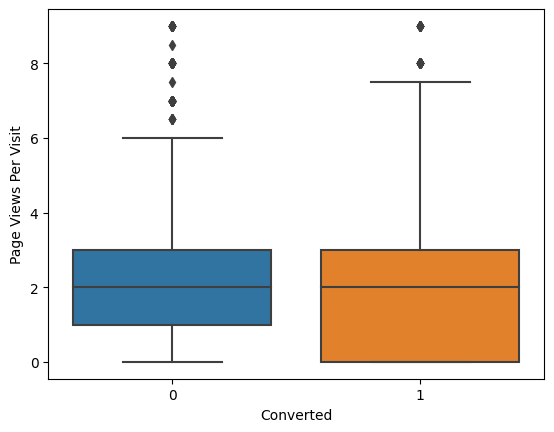

In [75]:
# plotting boxplot to visualize outlier
sns.boxplot(x='Converted', y='Page Views Per Visit', data = data)
plt.show()

In [76]:
# checking shape
data.shape

(8953, 14)

In [77]:
#clubbing all the categorial variables
data.loc[:, data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
# creating dummy variables
dummy = pd.get_dummies(data=data)

In [79]:
# checking dummy values
dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [80]:
# checking dummy info
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_API                                       8953 non-null   uint8  
 5   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 7   Lead Origin_Lead Import                               8953 non-null   uint8  
 8   Lead Source_Direct Traffic                            8953

In [81]:
# importing necesaay libabries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve

In [82]:
# seperarting dependent and indeoendent variable
y = dummy['Converted']
X=dummy.drop('Converted', axis=1)

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_API                                       6267 non-null   uint8  
 4   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 6   Lead Origin_Lead Import                               6267 non-null   uint8  
 7   Lead Source_Direct Traffic                            6267 non-null   uint8  
 8   Lead Source_Google                                    6

In [84]:
#scaling numeric columns
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [85]:
#initiize the logistic regression
logreg = LogisticRegression()

In [86]:
 # running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [87]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Do Not Email_No', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_All_Management_Specializations',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International B

In [89]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1234.2
Date:                Mon, 21 Aug 2023   Deviance:                       2468.4
Time:                        05:27:15   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6073
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7121      0.100    -17.141      0.000      -1.908      -1.516
Total Time Spent on Website                       1.0930      0.061     17.930      0.000       0.974       1.213
Lead Origin_Lead Add Form                         2.2872      0.458      4.999      0.000       1.390       3.184
Lead Source_Olark Chat                            1.2949      0.147      8.820      0.000       1.007       1.583
Lead Source_Welingak Website                      4.0500      1.115      3.632      0.000       1.864       6.236
Last Activity_SMS Sent                            1.4107      0.228      6.174      0.000       0.963       1.858
Tags_Closed by Horizzon                           7.1572      1.021      7.011      0.000       5.156       9.158
Tags_Interested in other courses                 -2.1111      0.410     -5.154      0.000      -2.914      -1.308
Tags_Lost to EINS                                 5.6368      0.610      9.238      0.000       4.441       6.833
Tags_Other                                       -2.4589      0.213    -11.525      0.000      -2.877      -2.041
Tags_Ringing                                     -3.5913      0.245    -14.674      0.000      -4.071      -3.112
Tags_Will revert after reading the email          4.5540      0.189     24.082      0.000       4.183       4.925
Last Notable Activity_Email Link Clicked         -1.3029      0.482     -2.704      0.007      -2.247      -0.358
Last Notable Activity_Modified                   -1.4146      0.152     -9.319      0.000      -1.712      -1.117
Last Notable Activity_Olark Chat Conversation    -2.1187      0.490     -4.327      0.000      -3.078      -1.159
Last Notable Activity_SMS Sent                    0.8325      0.262      3.175      0.001       0.319       1.346
=================================================================================================================
"""

In [90]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1234.2
Date:                Mon, 21 Aug 2023   Deviance:                       2468.4
Time:                        05:27:16   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6073
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7121      0.100    -17.141      0.000      -1.908      -1.516
Total Time Spent on Website                       1.0930      0.061     17.930      0.000       0.974       1.213
Lead Origin_Lead Add Form                         2.2872      0.458      4.999      0.000       1.390       3.184
Lead Source_Olark Chat                            1.2949      0.147      8.820      0.000       1.007       1.583
Lead Source_Welingak Website                      4.0500      1.115      3.632      0.000       1.864       6.236
Last Activity_SMS Sent                            1.4107      0.228      6.174      0.000       0.963       1.858
Tags_Closed by Horizzon                           7.1572      1.021      7.011      0.000       5.156       9.158
Tags_Interested in other courses                 -2.1111      0.410     -5.154      0.000      -2.914      -1.308
Tags_Lost to EINS                                 5.6368      0.610      9.238      0.000       4.441       6.833
Tags_Other                                       -2.4589      0.213    -11.525      0.000      -2.877      -2.041
Tags_Ringing                                     -3.5913      0.245    -14.674      0.000      -4.071      -3.112
Tags_Will revert after reading the email          4.5540      0.189     24.082      0.000       4.183       4.925
Last Notable Activity_Email Link Clicked         -1.3029      0.482     -2.704      0.007      -2.247      -0.358
Last Notable Activity_Modified                   -1.4146      0.152     -9.319      0.000      -1.712      -1.117
Last Notable Activity_Olark Chat Conversation    -2.1187      0.490     -4.327      0.000      -3.078      -1.159
Last Notable Activity_SMS Sent                    0.8325      0.262      3.175      0.001       0.319       1.346
=================================================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.38
4,Last Activity_SMS Sent,6.17
1,Lead Origin_Lead Add Form,1.86
12,Last Notable Activity_Modified,1.84
10,Tags_Will revert after reading the email,1.60
2,Lead Source_Olark Chat,1.49
0,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.22
8,Tags_Other,1.18


In [92]:
#dropping variable with high VIF
col = col.drop(['Last Notable Activity_SMS Sent','Last Activity_SMS Sent'],1)

In [93]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1409.6
Date:                Mon, 21 Aug 2023   Deviance:                       2819.1
Time:                        05:27:16   Pearson chi2:                 7.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5847
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8427      0.074    -11.436      0.000      -0.987      -0.698
Total Time Spent on Website                       1.1143      0.057     19.513      0.000       1.002       1.226
Lead Origin_Lead Add Form                         2.7924      0.445      6.273      0.000       1.920       3.665
Lead Source_Olark Chat                            1.1399      0.134      8.505      0.000       0.877       1.403
Lead Source_Welingak Website                      3.6603      1.106      3.309      0.001       1.492       5.828
Tags_Closed by Horizzon                           6.7441      1.018      6.628      0.000       4.750       8.739
Tags_Interested in other courses                 -2.3745      0.383     -6.193      0.000      -3.126      -1.623
Tags_Lost to EINS                                 5.4028      0.609      8.868      0.000       4.209       6.597
Tags_Other                                       -2.3844      0.201    -11.881      0.000      -2.778      -1.991
Tags_Ringing                                     -2.9849      0.229    -13.032      0.000      -3.434      -2.536
Tags_Will revert after reading the email          4.3895      0.181     24.239      0.000       4.035       4.744
Last Notable Activity_Email Link Clicked         -2.0538      0.476     -4.319      0.000      -2.986      -1.122
Last Notable Activity_Modified                   -1.8588      0.120    -15.493      0.000      -2.094      -1.624
Last Notable Activity_Olark Chat Conversation    -2.8675      0.484     -5.922      0.000      -3.816      -1.918
=================================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.83
11,Last Notable Activity_Modified,1.49
2,Lead Source_Olark Chat,1.43
0,Total Time Spent on Website,1.42
9,Tags_Will revert after reading the email,1.36
3,Lead Source_Welingak Website,1.33
4,Tags_Closed by Horizzon,1.21
7,Tags_Other,1.14
5,Tags_Interested in other courses,1.12
6,Tags_Lost to EINS,1.06


In [95]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.145747
4696    0.020436
3274    0.173898
2164    0.005229
1667    0.992959
7024    0.337461
8018    0.028137
778     0.031456
6942    0.007262
4440    0.229274
dtype: float64

In [96]:
#making preds
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14574707, 0.02043648, 0.17389831, 0.00522887, 0.99295932,
       0.33746146, 0.02813733, 0.03145628, 0.00726176, 0.22927379])

In [97]:
# creating preds data
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.145747,9196
1,0,0.020436,4696
2,0,0.173898,3274
3,0,0.005229,2164
4,1,0.992959,1667


In [98]:
#creating probability distribtution
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.145747,9196,0
1,0,0.020436,4696,0
2,0,0.173898,3274,0
3,0,0.005229,2164,0
4,1,0.992959,1667,1


In [99]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3730  152]
 [ 401 1984]]


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9117600127652784


In [101]:
# calculating tp,tn,fp,fn values
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8318658280922432

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608449252962391

In [104]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03915507470376095


In [105]:
# positive predictive value
print (TP / float(TP+FP))

0.9288389513108615


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9029290728637134


In [107]:
#defing a function that will draw auc roc
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

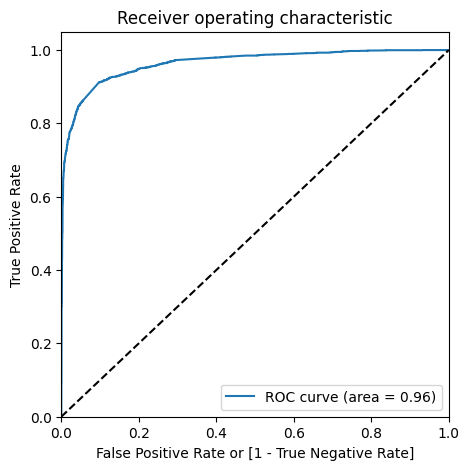

In [108]:
# plotting the roc curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [109]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.145747,9196,0,1,1,0,0,0,0,0,0,0,0
1,0,0.020436,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.173898,3274,0,1,1,0,0,0,0,0,0,0,0
3,0,0.005229,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.992959,1667,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.814744  0.968134  0.720505
0.2   0.2  0.866603  0.939623  0.821741
0.3   0.3  0.901229  0.915304  0.892581
0.4   0.4  0.913675  0.850734  0.952344
0.5   0.5  0.911760  0.831866  0.960845
0.6   0.6  0.906494  0.808386  0.966770
0.7   0.7  0.901388  0.778616  0.976816
0.8   0.8  0.889421  0.732075  0.986090
0.9   0.9  0.879209  0.696436  0.991499


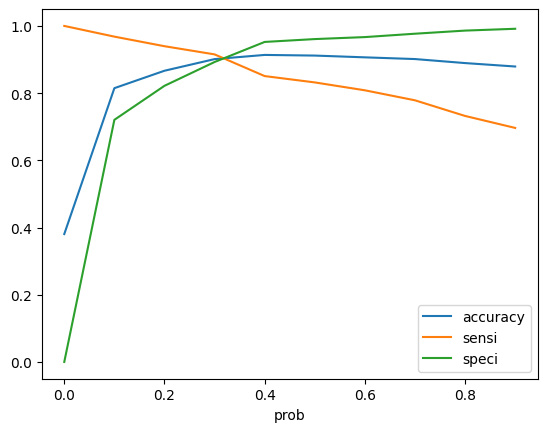

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [112]:
#craeting a dataset base don prpbabity distribution
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.145747,9196,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.020436,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.173898,3274,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.005229,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.992959,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [113]:
# finding the lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.145747,9196,0,15
1,0,0.020436,4696,0,2
2,0,0.173898,3274,0,17
3,0,0.005229,2164,0,1
4,1,0.992959,1667,1,99


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9012286580501038

In [115]:
# creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3465,  417],
       [ 202, 2183]])

In [116]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9153039832285115

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.89258114374034

In [119]:
# calculating precision score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8396153846153847

In [120]:
# calculating recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9153039832285115

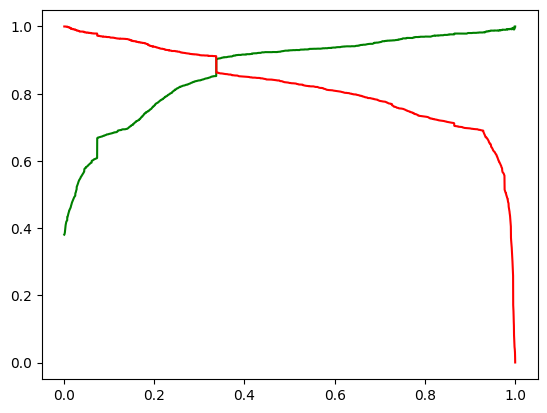

In [121]:
# plotting precison recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [122]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8135,-0.423857,0.812462,-0.170849,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2712,-0.090676,-0.421456,0.356568,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [123]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7681,-0.311318,0,0,0,0,0,0,0,1,0,0,0,0
984,-0.550262,0,0,0,0,0,0,1,0,0,0,1,0
8135,0.812462,0,0,0,0,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,1,0,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,1,0,0,0


In [124]:
X_test_sm = sm.add_constant(X_test)

In [125]:
#PREDICTIONS ON TEST SET
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.015150
984     0.003338
8135    0.515633
6915    0.010685
2712    0.955941
244     0.004301
4698    0.015967
8287    0.072068
6791    0.986395
8970    0.004496
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
7681,0.015150
984,0.003338
8135,0.515633
6915,0.010685
2712,0.955941


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.015150
1,0,984,0.003338
2,0,8135,0.515633
3,0,6915,0.010685
4,1,2712,0.955941


In [132]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.015150
1,0,984,0.003338
2,0,8135,0.515633
3,0,6915,0.010685
4,1,2712,0.955941


In [133]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.015150,2
1,984,0,0.003338,0
2,8135,0,0.515633,52
3,6915,0,0.010685,1
4,2712,1,0.955941,96


In [134]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [135]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.015150,2,0
1,984,0,0.003338,0,0
2,8135,0,0.515633,52,1
3,6915,0,0.010685,1,0
4,2712,1,0.955941,96,1


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9084139985107967

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1505,  171],
       [  75,  935]])

In [138]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9257425742574258

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8979713603818615

In [141]:
#calculating precison score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8453887884267631

In [142]:
# calculating recaall score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9257425742574258